In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

In [ ]:
data_dir = '/content/drive/MyDrive/Garbage classification/Garbage classification'

In [ ]:
total_dir = len(os.listdir(data_dir))
total_files = 0

for dirname, _, filenames in os.walk(data_dir):
    print('counting:', dirname)
    files_counter = 0
    for file in filenames:
        files_counter += 1
    total_files += files_counter
    print('total files in dir:', files_counter)

print('--------')
print('total number of files',total_files)
print('total number of directories',total_dir)

counting: /content/drive/MyDrive/Garbage classification/Garbage classification
total files in dir: 0
counting: /content/drive/MyDrive/Garbage classification/Garbage classification/plastic
total files in dir: 482
counting: /content/drive/MyDrive/Garbage classification/Garbage classification/glass
total files in dir: 501
counting: /content/drive/MyDrive/Garbage classification/Garbage classification/metal
total files in dir: 410
counting: /content/drive/MyDrive/Garbage classification/Garbage classification/cardboard
total files in dir: 403
counting: /content/drive/MyDrive/Garbage classification/Garbage classification/paper
total files in dir: 594
counting: /content/drive/MyDrive/Garbage classification/Garbage classification/trash
total files in dir: 137
--------
total number of files 2527
total number of directories 6


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=100
)

validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=100
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


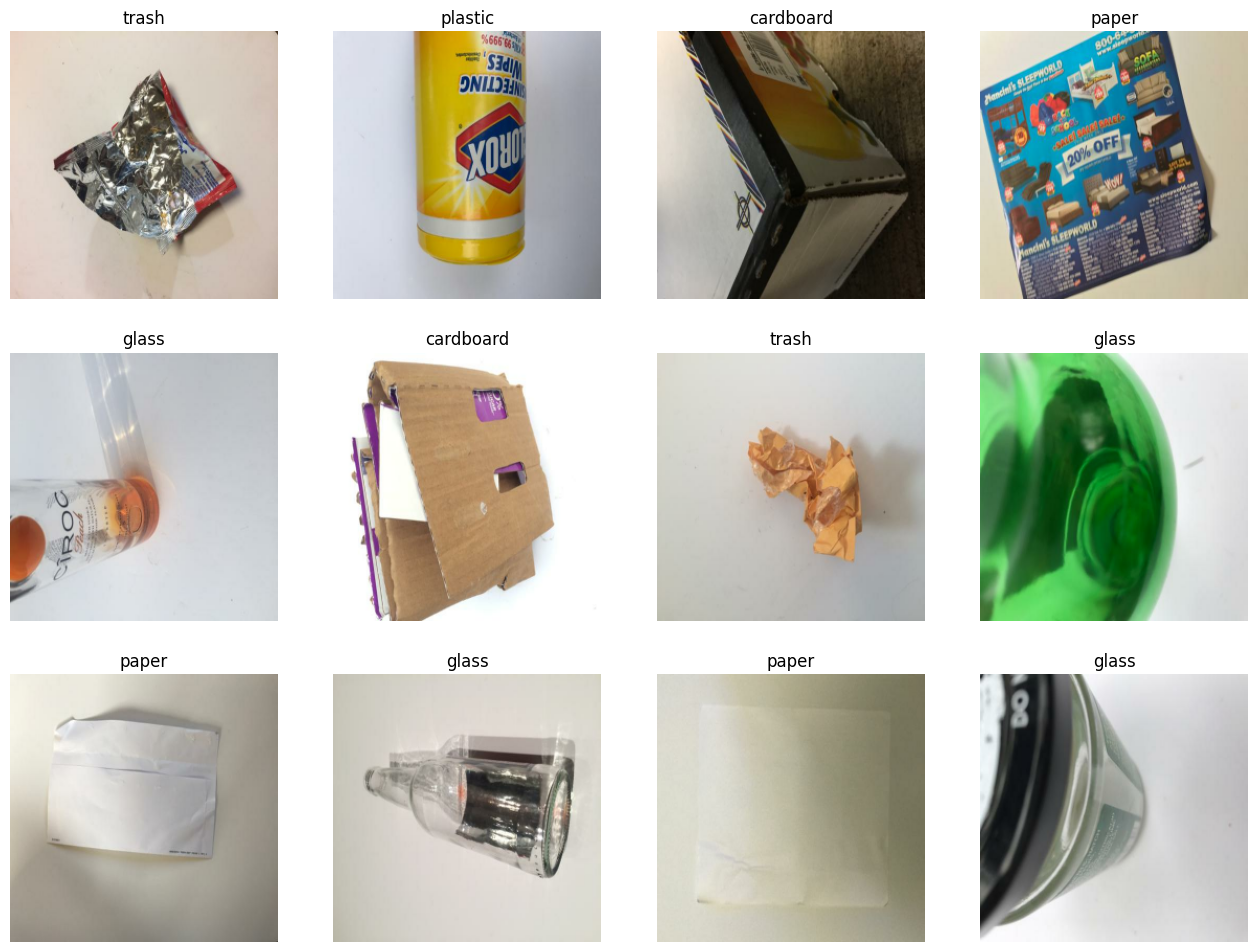

In [ ]:
plt.figure(figsize=(16, 16))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

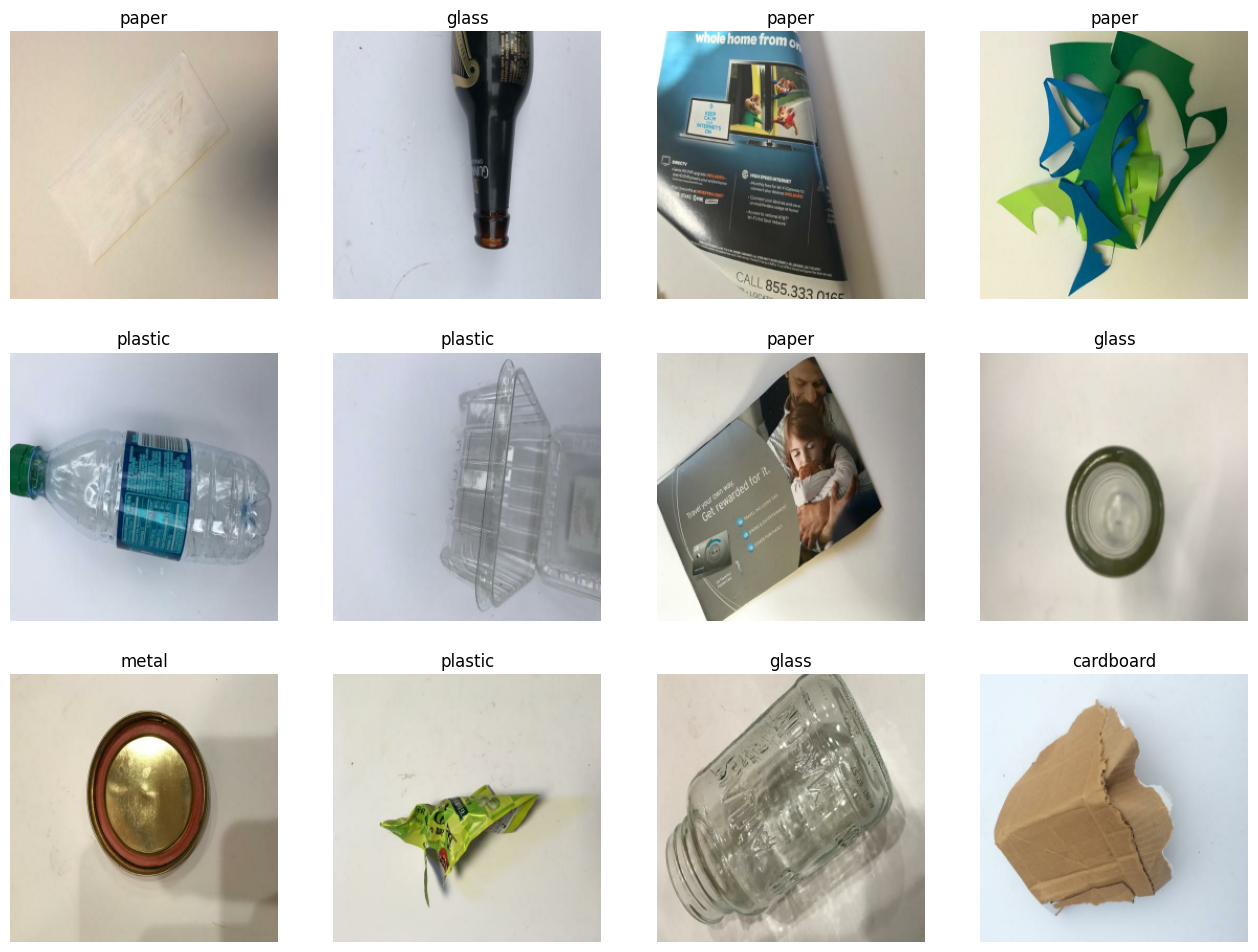

In [ ]:
plt.figure(figsize=(16, 16))
for images, labels in validation_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
train_batch = train_ds.as_numpy_iterator().next()

print('total of batches:',len(train_ds))
print('images batch shape:',train_batch[0].shape)
print('labels batch shape:',train_batch[1].shape)

total of batches: 64
images batch shape: (32, 256, 256, 3)
labels batch shape: (32,)


In [ ]:
validation_batch = validation_ds.as_numpy_iterator().next()

print('total of batches:',len(validation_ds))
print('images batch shape:',validation_batch[0].shape)
print('labels batch shape:',validation_batch[1].shape)

total of batches: 16
images batch shape: (32, 256, 256, 3)
labels batch shape: (32,)


In [ ]:
input_shape = (256,256,3)
base_model = tf.keras.applications.ResNet50V2(include_top=False, input_shape=input_shape)

# make the layers of the model trainable to fine-tunning
base_model.trainable = True

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_conv[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_bn    │ (None, 64, 64, 64)     │            256 │ pool1_pool[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_preact_relu  │ (None, 64, 64, 64)     │              0 │ conv2_block1_preact_b… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,096 │ conv2_block1_preact_r… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_pad        │ (None, 66, 66, 64)     │              0 │ conv2_block1_1_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,864 │ conv2_block1_2_pad[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_preact_r… │
│ (Conv2D)             

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 23,519,360 (89.72 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [ ]:
tuning_layer_name = 'conv5_block1_preact_bn'
tuning_layer = base_model.get_layer(tuning_layer_name)
tuning_index = base_model.layers.index(tuning_layer)

# freeze all the layers before the tuning layer
for layer in base_model.layers[:tuning_index]:
    layer.trainable =  False

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./127.5, offset=-1),  # Rescaling
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),  # Random flip
    tf.keras.layers.RandomRotation(0.2),  # Random rotation
    tf.keras.layers.RandomZoom(0.2)  # Random zoom
], name='data_augmentation')

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(6, activation='softmax')
])

learning_rate = 0.00001
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),  # 'lr' yerine 'learning_rate'
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=25
)

Epoch 1/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 958s 15s/step - accuracy: 0.1745 - loss: 2.0276 - val_accuracy: 0.5267 - val_loss: 1.2556
Epoch 2/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 960s 14s/step - accuracy: 0.5319 - loss: 1.2884 - val_accuracy: 0.6634 - val_loss: 0.9110
Epoch 3/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 940s 15s/step - accuracy: 0.6745 - loss: 0.9832 - val_accuracy: 0.7347 - val_loss: 0.7388
Epoch 4/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 982s 15s/step - accuracy: 0.7434 - loss: 0.8139 - val_accuracy: 0.7663 - val_loss: 0.6357
Epoch 5/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 978s 15s/step - accuracy: 0.7819 - loss: 0.6795 - val_accuracy: 0.8059 - val_loss: 0.5687
Epoch 6/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 988s 15s/step - accuracy: 0.8199 - loss: 0.5872 - val_accuracy: 0.8277 - val_loss: 0.5161
Epoch 7/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 942s 15s/step - accuracy: 0.8221 - loss: 0.5522 - val_accuracy: 0.8396 - val_loss: 0.4762
Epoch 8/25
64/64 ━━━━━━━━━━━━━━━━━━━━ 982s 15s/step - accuracy: 0.8527 - loss: 0.4680 - val_accuracy: 0.